In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
path="drive/My Drive/Project"

In [3]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
import torchvision.transforms as transforms

In [4]:
target_size = (227, 227)
dataset = ImageFolder("drive/My Drive/Project", transform = transforms.Compose([
    transforms.Resize(target_size),  # Resize the image
    transforms.ToTensor(),            # Convert to tensor
]))

In [5]:
img, label = dataset[0]
print(img.shape, label)
img

torch.Size([3, 227, 227]) 0


tensor([[[0.7490, 0.7765, 0.7882,  ..., 0.7804, 0.7569, 0.7569],
         [0.7451, 0.7647, 0.7608,  ..., 0.7843, 0.7843, 0.7451],
         [0.7608, 0.7804, 0.7608,  ..., 0.7765, 0.7725, 0.7490],
         ...,
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],

        [[0.7490, 0.7765, 0.7882,  ..., 0.7804, 0.7569, 0.7569],
         [0.7451, 0.7647, 0.7608,  ..., 0.7843, 0.7843, 0.7451],
         [0.7608, 0.7804, 0.7608,  ..., 0.7765, 0.7725, 0.7490],
         ...,
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],

        [[0.7490, 0.7765, 0.7882,  ..., 0.7804, 0.7569, 0.7569],
         [0.7451, 0.7647, 0.7608,  ..., 0.7843, 0.7843, 0.7451],
         [0.7608, 0.7804, 0.7608,  ..., 0.7765, 0.7725, 0.

In [6]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.facecolor'] = '#ffffff'

In [7]:
def show_example(img, label):
    print('Label: ', dataset.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1, 2, 0))

Label:  COVID (0)


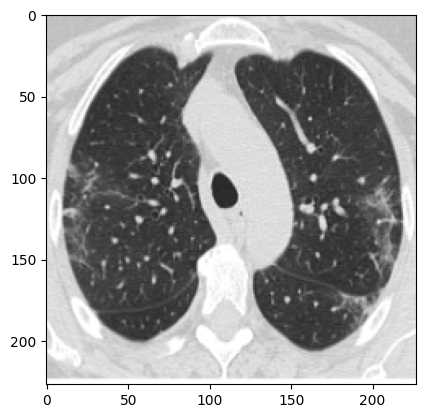

In [8]:
show_example(*dataset[0])

Label:  COVID (0)


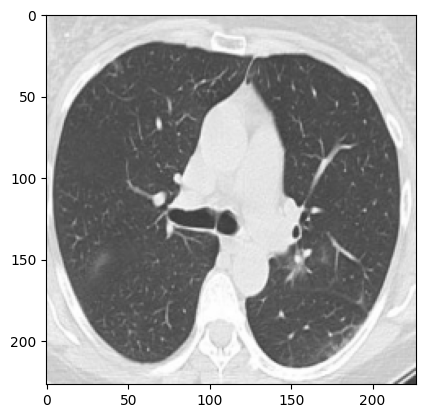

In [9]:
show_example(*dataset[1099])

In [10]:
import torch
import torchvision
from torch.utils.data import random_split

In [11]:
random_seed = 42
torch.manual_seed(random_seed);

In [12]:
val_size = 700
test_size=300
train_size = len(dataset) - val_size - test_size

train_ds, val_ds, test_ds = random_split(dataset, [train_size, val_size, test_size])
len(train_ds), len(val_ds),len(test_ds)

(1507, 700, 300)

In [13]:
from torch.utils.data.dataloader import DataLoader

batch_size=32

In [14]:
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=2, pin_memory=True)
val_dl = DataLoader(val_ds, batch_size*2,shuffle=True, num_workers=2, pin_memory=True)
test_dl=DataLoader(test_ds, batch_size*2,shuffle=True, num_workers=2, pin_memory=True)

In [15]:
from torchvision.utils import make_grid

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break

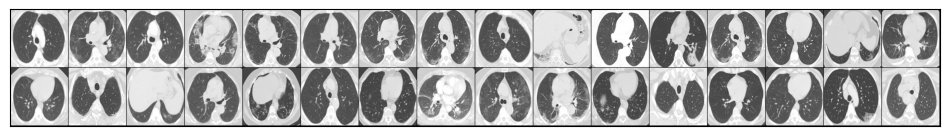

In [16]:
show_batch(train_dl)

In [17]:
import torch.nn as nn
import torch.nn.functional as F

In [18]:
class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss

    def validation_step(self, batch):
        images, labels = batch
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))

def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [19]:
class CovidCnnModel(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            # nn.Conv2d(3,96, kernel_size=11,stride=4, padding=1),
            # nn.ReLU(),
            # nn.MaxPool2d(3, stride=2), # output: 96x27x27
            # nn.Conv2d(96,256, kernel_size=5,stride=2, padding=1),
            # nn.ReLU(),
            # nn.Conv2d(256,384, kernel_size=3,stride=2,padding=1),
            # nn.ReLU(),
            # nn.Conv2d(384,384, kernel_size=3,stride=2,padding=1),
            # nn.ReLU(),
            # nn.Conv2d(384,256, kernel_size=3,stride=2,padding=1),
            # nn.ReLU(),
            # nn.MaxPool2d(3, stride=2),# output: 256x6x6
            # nn.Flatten(),
            # nn.Linear(9216, 4096),
            # nn.Dropout(0.4),
            # nn.Linear(4096, 4096),
            # nn.Dropout(0.4),
            # nn.Linear(4096, 2),
            # nn.Sigmoid()
            nn.Conv2d(3, 96, kernel_size=11, stride=4, padding=0),
            nn.BatchNorm2d(96),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 3, stride = 2),
            nn.Conv2d(96, 256, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 3, stride = 2),
            nn.Conv2d(256, 384, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(384),
            nn.ReLU(),
            nn.Conv2d(384, 384, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(384),
            nn.ReLU(),
            nn.Conv2d(384, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 3, stride = 2),
            nn.Dropout(0.5),
            nn.Flatten(),
            nn.Linear(9216, 4096),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(4096, 4096),
            nn.ReLU(),
            nn.Linear(4096, 2),
            nn.Sigmoid())

    def forward(self, xb):
        return self.network(xb)

In [20]:
model = CovidCnnModel()
model

CovidCnnModel(
  (network): Sequential(
    (0): Conv2d(3, 96, kernel_size=(11, 11), stride=(4, 4))
    (1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (5): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(384, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): BatchNorm2d(384, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): ReLU()
    (14): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1

In [21]:
for images, labels in train_dl:
    print('images.shape:', images.shape)
    out = model(images)
    print('out.shape:', out.shape)
    print('out[0]:', out[0])
    break

images.shape: torch.Size([32, 3, 227, 227])
out.shape: torch.Size([32, 2])
out[0]: tensor([0.4753, 0.4852], grad_fn=<SelectBackward0>)


In [22]:
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [23]:
evaluate(model, val_dl)

{'val_loss': 0.6931663155555725, 'val_acc': 0.4892992675304413}

In [24]:
num_epochs = 10
opt_func = torch.optim.Adam
lr = 0.0001

In [25]:
history = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

Epoch [0], train_loss: 0.6689, val_loss: 0.6443, val_acc: 0.6510
Epoch [1], train_loss: 0.5677, val_loss: 0.5788, val_acc: 0.7301
Epoch [2], train_loss: 0.4923, val_loss: 0.5505, val_acc: 0.7489
Epoch [3], train_loss: 0.4621, val_loss: 0.5369, val_acc: 0.7716
Epoch [4], train_loss: 0.4325, val_loss: 0.4416, val_acc: 0.8697
Epoch [5], train_loss: 0.4205, val_loss: 0.8235, val_acc: 0.4901
Epoch [6], train_loss: 0.4441, val_loss: 0.5308, val_acc: 0.7770
Epoch [7], train_loss: 0.4404, val_loss: 0.5337, val_acc: 0.7795
Epoch [8], train_loss: 0.4311, val_loss: 0.7985, val_acc: 0.5089
Epoch [9], train_loss: 0.4536, val_loss: 0.5141, val_acc: 0.7928


In [26]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

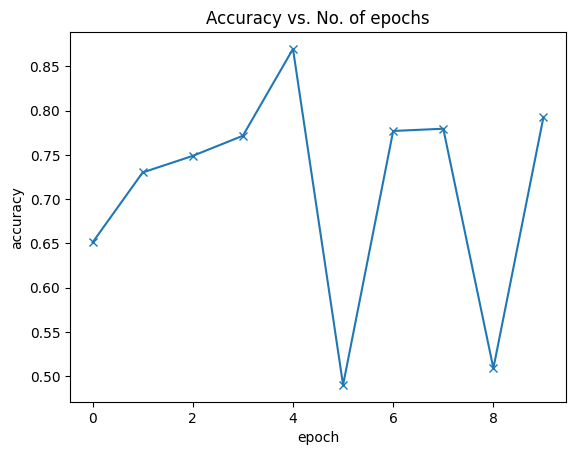

In [27]:
plot_accuracies(history)

In [28]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

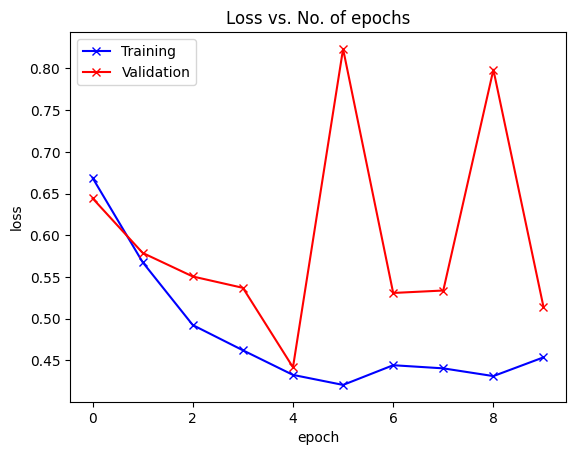

In [29]:
plot_losses(history)

In [30]:
evaluate(model,test_dl)

{'val_loss': 0.5123293995857239, 'val_acc': 0.7897726893424988}

In [31]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = img.unsqueeze(0)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return dataset.classes[preds[0].item()]

Label: COVID , Predicted: COVID


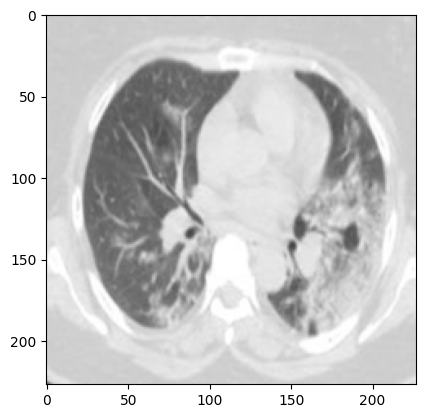

In [32]:
img, label = test_ds[0]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

In [33]:
import numpy as np
import torch
from sklearn.metrics import precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you already have your validation data (X_val_tensor, y_val_tensor)
# Convert X_val_tensor to numpy array for easier handling
test_label=[]
for img,label in test_ds:
  test_label.append(label)
y_val=np.array(test_label)
y_val
# Predict classes for validation data

# with torch.no_grad():
#     outputs = model(test_ds)
#     predicted_labels = torch.argmax(outputs, dim=1).numpy()



array([0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1])

In [34]:
model.eval()
predicted_labels = []

# Iterate through all the test images
for img,label1 in test_ds:
    # Predict the label for the current image
    label = predict_image(img, model)
    if(label=='COVID'):
      predicted_labels.append(0)
    else:
      predicted_labels.append(1)
    # Append the predicted label to the list
    # predicted_labels.append(label)

# Convert the list of predicted labels to a numpy array
predicted_labels_array = np.array(predicted_labels)

predicted_labels_array

array([0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1])

Precision: 0.7258064516129032
Recall: 0.9060402684563759


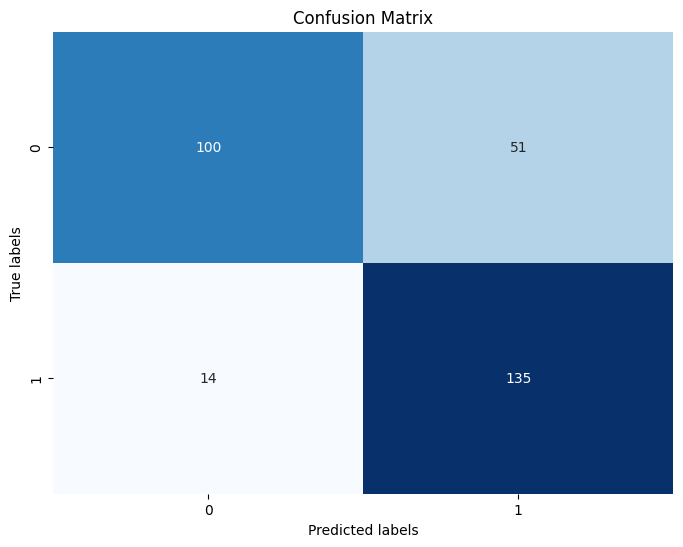

In [35]:
# Calculate precision and recall
precision = precision_score(y_val, predicted_labels_array)
recall = recall_score(y_val, predicted_labels_array)
print("Precision:", precision)
print("Recall:", recall)

# Plot confusion matrix
cm = confusion_matrix(y_val, predicted_labels_array)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()


In [36]:
torch.save(model.state_dict(), '/content/drive/My Drive/simple_nnalexnet_model.pth')